### Title : Medical Insurance Cost Prediction

#### Business Problem: To predict the approximate cost of medical insurance based on availabe information of people with us.

In [1]:
# for dataframe and cleaning purposes
import pandas as pd
# for applying any mathematical function
import numpy as np
# for visualization purpose
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Importing required model for our analysis
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.pipeline import Pipeline
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Importing metrics for calculation of accuracy score
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, GridSearchCV


import warnings
warnings.simplefilter(action='ignore')

In [2]:
## Reading the  data
data=pd.read_csv('D:/Project/Medical-Insurance-Cost/insurance.csv')
# seeing head of dataset
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
# make copy of data
data_copy=data.copy()

data_copy.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
#Checking Shape of Data
data.shape

(1338, 7)

In [5]:
# Checking datatypes
data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [6]:
# Checking for values in each column
for i in data.columns:
    print(f'Column Name:{data[i].value_counts()}')
    print(30*'********')

Column Name:age
18    69
19    68
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: count, dtype: int64
************************************************************************************************************************************************************************************************************************************************
Column Name:sex
male      676
female    662
Name: count, dtype: int64
********************************************************************************************************************************************************************************************************************************

In [7]:
# Checking for null values
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

* No null null value present in data

In [8]:
data_copy.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

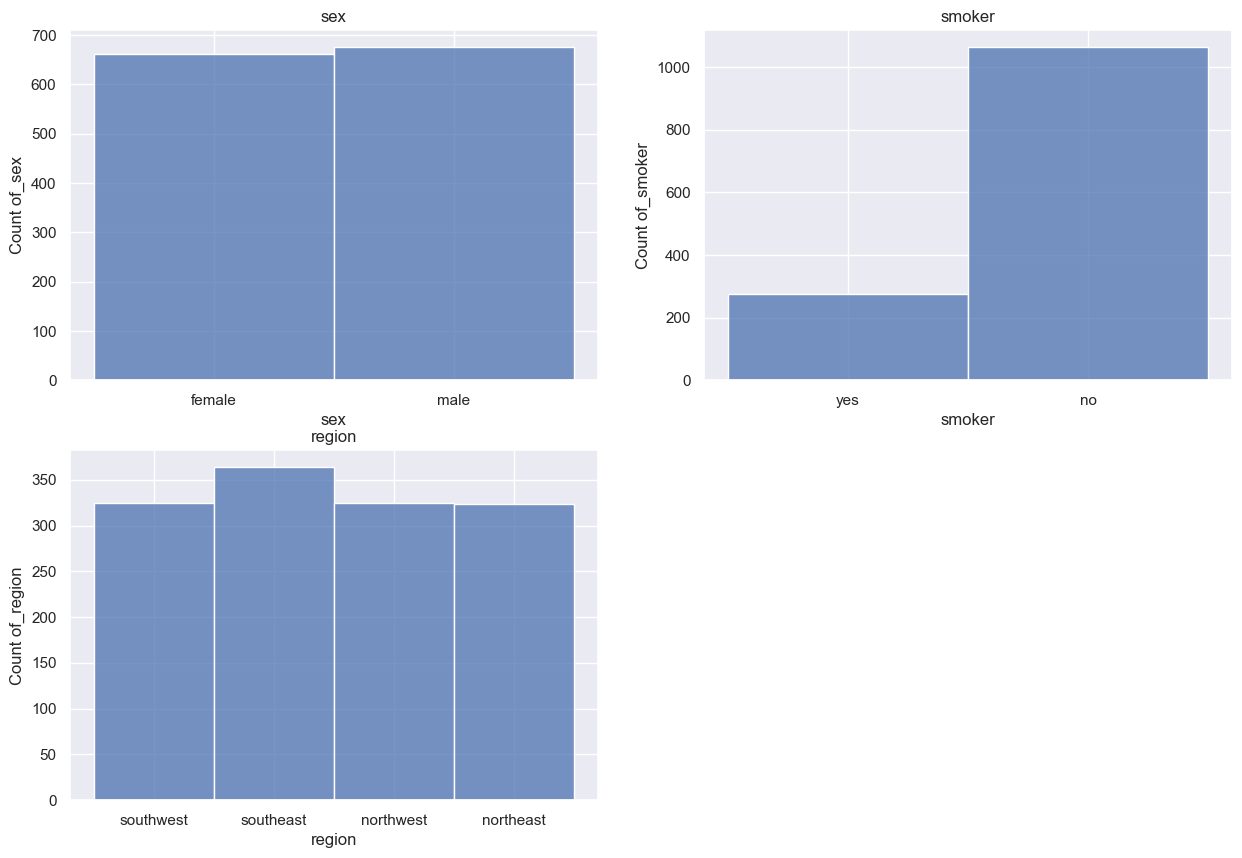

In [9]:
# Visualizing the categorical column
cat_col=data_copy.select_dtypes(exclude='number')
lis=cat_col.columns
plt.figure(figsize=(15,10))
for i in range(len(cat_col.columns)):
    plt.subplot(2,2,i+1)
    plt.title(lis[i])
    plt.ylabel('Count of_'+lis[i])
    plt.xlabel(lis[i])
    sns.histplot(data=data_copy,x=lis[i])
plt.show()


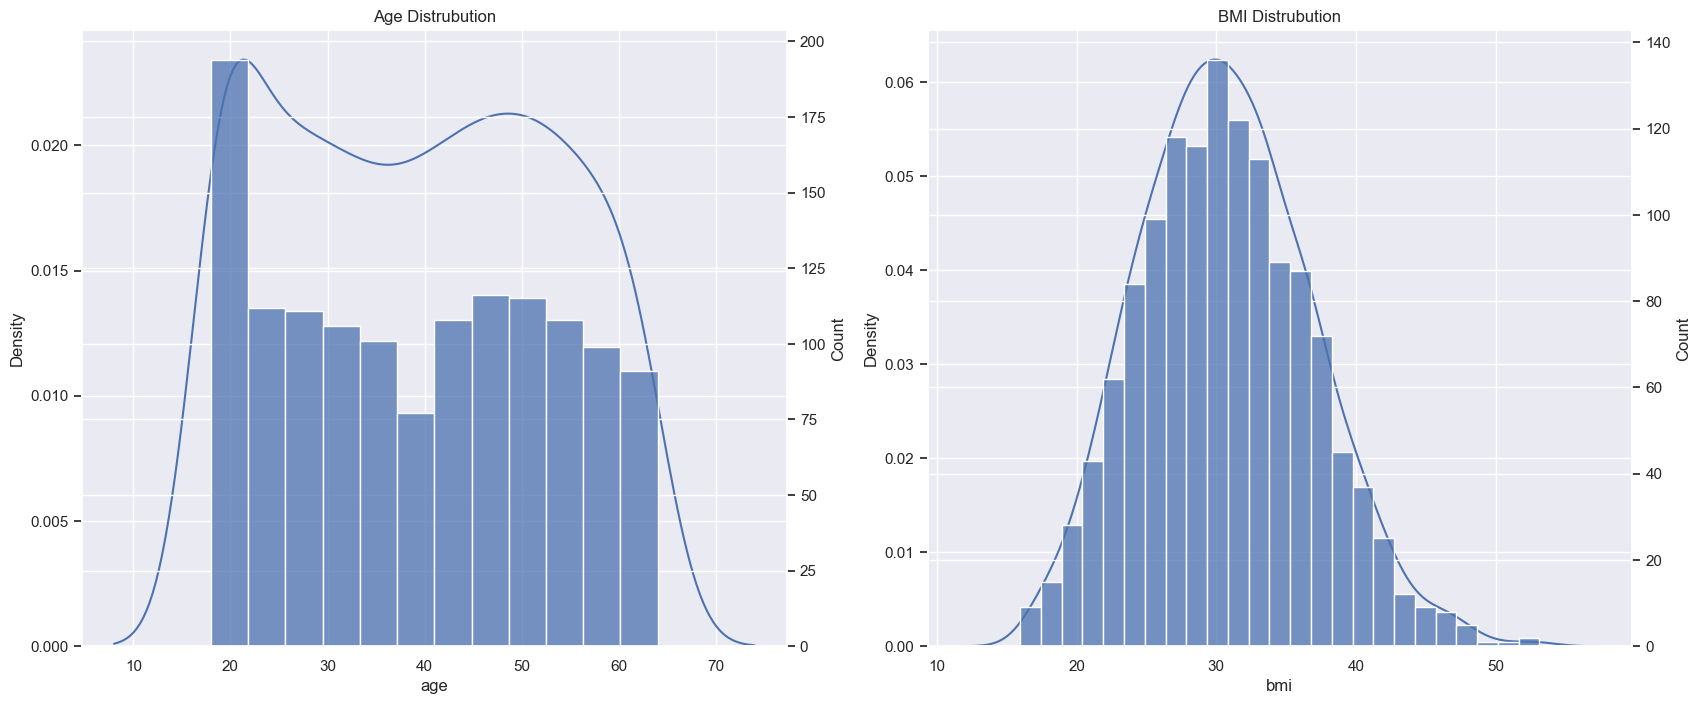

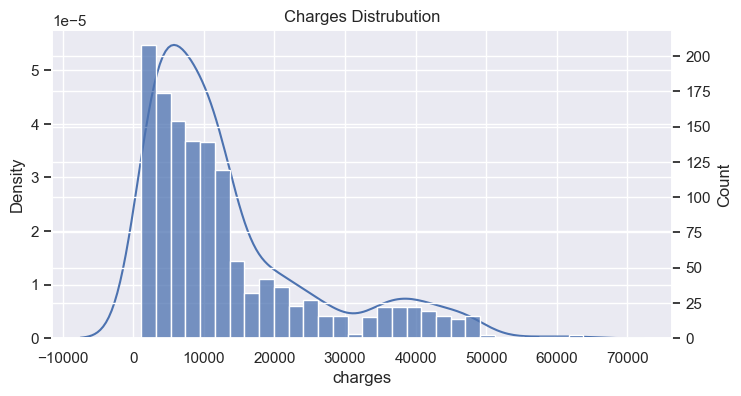

In [10]:
# Visualizing the numerical column
fig, ax = plt.subplots(1,2, figsize=(20,8))
sns.kdeplot(data_copy.age,ax=ax[0])
ax2=ax[0].twinx()
sns.histplot(data_copy.age,ax=ax2)
ax[0].set_title('Age Distrubution')

sns.kdeplot(data_copy.bmi,ax=ax[1])
ax2=ax[1].twinx()
sns.histplot(data_copy.bmi,ax=ax2)
ax[1].set_title('BMI Distrubution')

fig, ax = plt.subplots(figsize=(8,4))
sns.kdeplot(data_copy.charges,ax=ax)
ax2=ax.twinx()
sns.histplot(data_copy.charges,ax=ax2)
ax.set_title('Charges Distrubution');


* Person between 18 to 22 years are more taking insurance
* BMI is normally distributed between 10 to 50
* Count of taking insurance which is of less costs/charges are more

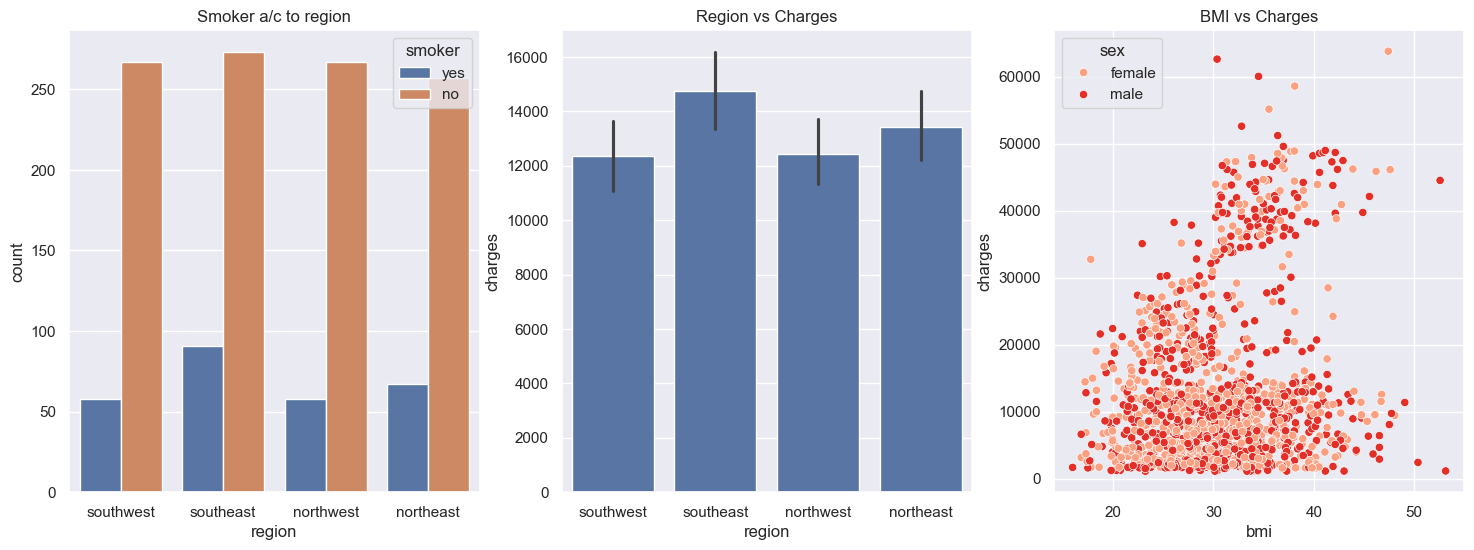

In [11]:
# Couting smoker region wise

fig, ax=plt.subplots(1,3, figsize=(18,6))
ax[0].set_title('Smoker a/c to region')
sns.countplot(data=data_copy,x=data_copy.region,hue=data_copy.smoker,ax=ax[0])

# To see outliers in charges column wrt to regions
ax[1].set_title('Region vs Charges')
sns.barplot(data=data_copy,y=data_copy.charges,x=data_copy.region,ax=ax[1])

ax[2].set_title('BMI vs Charges')
sns.scatterplot(x='bmi',y='charges',hue='sex',data=data_copy,palette='Reds',ax=ax[2]);


* South-East region has more smokers with respect to all regions.
* South-East region has higher Insurance charges as compared to all other regions.
* Charges for females as per bmi is mostly below 20K and on other hand charges for male are higher as per bmi.

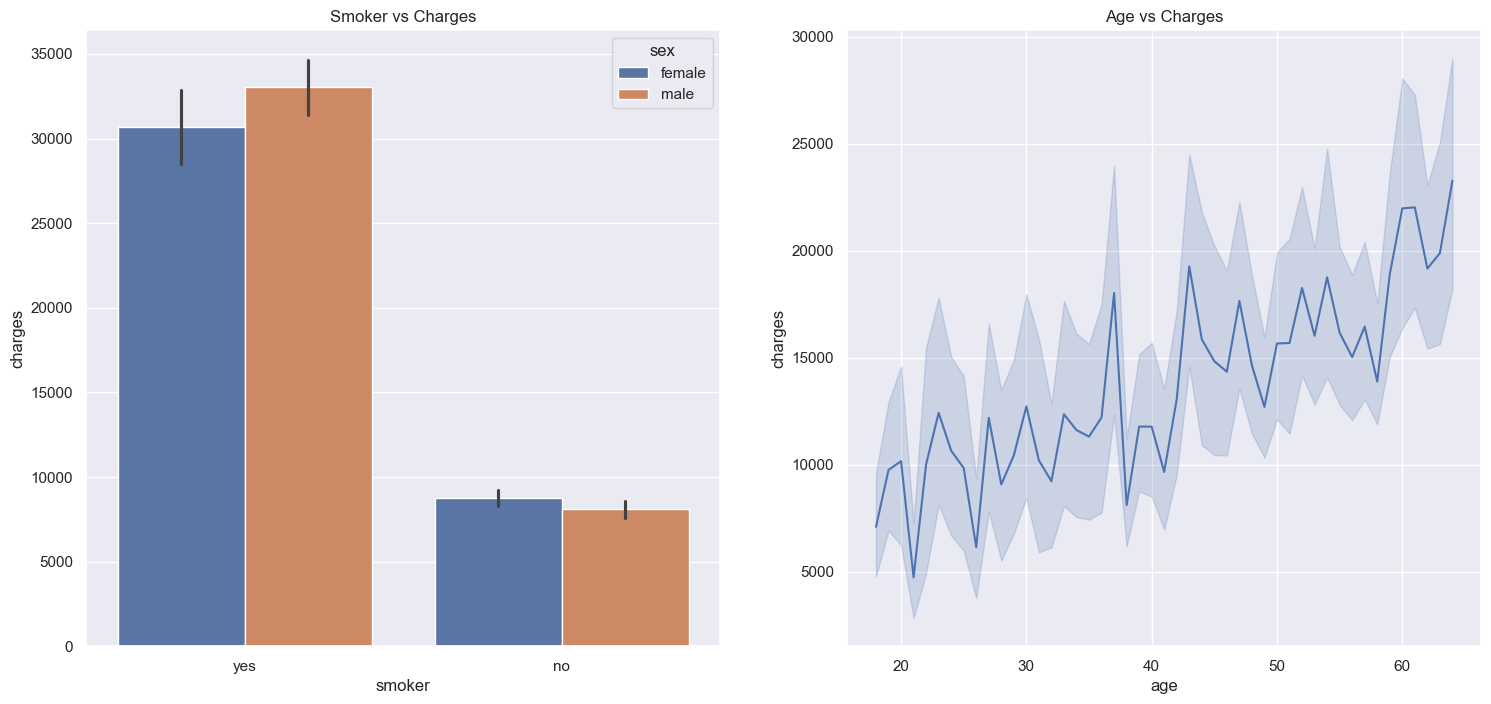

In [12]:
fig, ax=plt.subplots(1,2, figsize=(18,8))
ax[0].set_title('Smoker vs Charges')
sns.barplot(data=data_copy,x=data_copy.smoker,y=data_copy.charges,hue='sex',ax=ax[0])

ax[1].set_title('Age vs Charges')
sns.lineplot(data=data_copy,x=data.age,y=data.charges,ax=ax[1])
ax[1].set_xticklabels(ax[1].get_xticklabels());

* From above plot is clear that male and females which are smoker their charges are much higher as compared to non-smokers.
* We can see that the charges are increasing with age.

<Axes: title={'center': 'Checking Outlier in BMI'}, ylabel='bmi'>

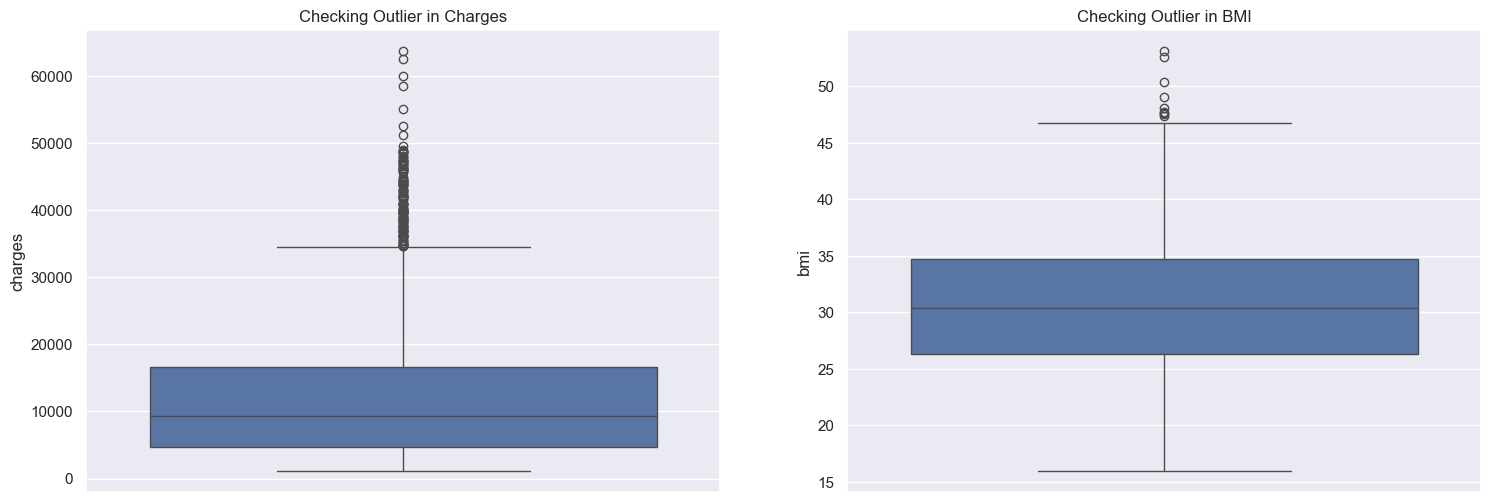

In [13]:
fig, ax=plt.subplots(1,2, figsize=(18,6))
ax[0].set_title('Checking Outlier in Charges')
sns.boxplot(data=data_copy,y=data_copy.charges,ax=ax[0])

# To see outliers in charges column wrt to regions
ax[1].set_title('Checking Outlier in BMI')
sns.boxplot(data=data_copy,y=data_copy.bmi,ax=ax[1])

* We can see outliers in Charges and BMI but then we cannot specifically categorise them as an outlier as there might be cases in which Charge for medical was actually very high.

In [14]:
l_encoder=LabelEncoder()
for i in cat_col.columns:
    data_copy[i+'_encoded'] =l_encoder.fit_transform(data_copy[i])

data_copy.head()

,age,sex,bmi,children,smoker,region,charges,sex_encoded,smoker_encoded,region_encoded
0,19,female,27.900,0,yes,southwest,16884.92400,0,1,3
1,18,male,33.770,1,no,southeast,1725.55230,1,0,2
2,28,male,33.000,3,no,southeast,4449.46200,1,0,2
3,33,male,22.705,0,no,northwest,21984.47061,1,0,1
4,32,male,28.880,0,no,northwest,3866.85520,1,0,1


### As charges are in thousands,age and bmi are in  ten's there is chances of skweness towards charges column. So to get rid of biased towards one column we will scale it.

In [15]:
scale= StandardScaler()

scaled_data=data_copy[['age','bmi','children','sex_encoded','smoker_encoded','region_encoded','charges']]


scaled_data=pd.DataFrame(scale.fit_transform(scaled_data.to_numpy()),columns=scaled_data.columns)
scaled_data.head()

,age,bmi,children,sex_encoded,smoker_encoded,region_encoded,charges
0,-1.438764,-0.453320,-0.908614,-1.010519,1.970587,1.343905,0.298584
1,-1.509965,0.509621,-0.078767,0.989591,-0.507463,0.438495,-0.953689
2,-0.797954,0.383307,1.580926,0.989591,-0.507463,0.438495,-0.728675
3,-0.441948,-1.305531,-0.908614,0.989591,-0.507463,-0.466915,0.719843
4,-0.513149,-0.292556,-0.908614,0.989591,-0.507463,-0.466915,-0.776802


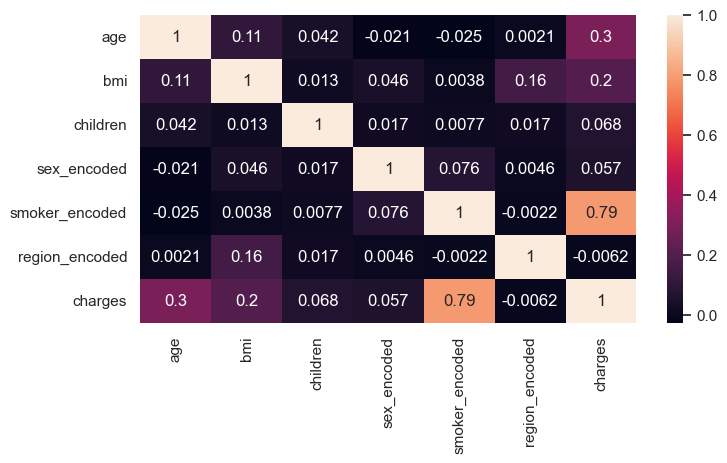

In [16]:
# Plotting correlation heatmap
plt.figure(figsize=(8,4))
sns.heatmap(scaled_data.corr(),annot=True);

In [17]:
X= scaled_data.drop(columns='charges',axis=1)
y= scaled_data[['charges']]

### Splitting data into train and test

In [18]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=100)

print('Size of X_train : ',X_train.shape,'\nSize of y_train : ',y_train.shape,'\nSize of  X_test : ',X_test.shape,'\nSize of  y_test : ',y_test.shape)

Size of X_train :  (936, 6) 
Size of y_train :  (936, 1) 
Size of  X_test :  (402, 6) 
Size of  y_test :  (402, 1)


### Linear Regression Model

In [19]:
lr_model= LinearRegression()

# fitting model over data
lr_model.fit(X_train,y_train)


LinearRegression()

In [20]:
cv_lr_model= cross_val_score(estimator=lr_model,X=X, y=y,cv=12)

# training score
y_pred_lr_train= lr_model.predict(X_train)
r2_score_lr_train =r2_score(y_train,y_pred_lr_train)

# testing score
y_pred_lr_test= lr_model.predict(X_test)
r2_score_lr_test =r2_score(y_test,y_pred_lr_test)

rmse_lr_model =(np.sqrt(mean_squared_error(y_test,y_pred_lr_test)))


print('CV Linear Regression :%0.3f'% cv_lr_model.mean())
print('R2_score (train)     :%0.3f'% r2_score_lr_train)
print('R2_score (test)      :%0.3f'% r2_score_lr_test)
print('RMSE                 :%0.3f'%rmse_lr_model)

CV Linear Regression :0.738
R2_score (train)     :0.738
R2_score (test)      :0.778
RMSE                 :0.469


### Ridge Regressor

In [21]:
steps =[('model',Ridge())]

pipeline =Pipeline(steps=steps)

parameters ={'model__alpha': [1e-15, 1e-10, 1e-8, 1e-3, 1e-2,1,2,5,10,20,25,35, 43,55,100], 'model__random_state' : [100]}
ridge_model = GridSearchCV(pipeline, parameters, cv=10)
ridge_model = ridge_model.fit(X_train, y_train)

In [22]:
ridge_model.best_estimator_,ridge_model.best_score_

(Pipeline(steps=[('model', Ridge(alpha=20, random_state=100))]),
 0.7143936547566481)

In [23]:
ridge = Ridge(alpha=20, random_state=100)
ridge.fit(X_train, y_train)
cv_ridge = ridge_model.best_score_

# training score
y_pred_ridge_train= ridge.predict(X_train)
r2_score_ridge_train =r2_score(y_train,y_pred_ridge_train)

# testing score
y_pred_ridge_test= ridge.predict(X_test)
r2_score_ridge_test =r2_score(y_test,y_pred_ridge_test)

rmse_ridge_model =(np.sqrt(mean_squared_error(y_test,y_pred_ridge_test)))


print('CV Linear Regression :%0.3f'% cv_ridge.mean())
print('R2_score (train)     :%0.3f'% r2_score_ridge_train)
print('R2_score (test)      :%0.3f'% r2_score_ridge_test)
print('RMSE                 :%0.3f'%rmse_ridge_model)

CV Linear Regression :0.714
R2_score (train)     :0.737
R2_score (test)      :0.779
RMSE                 :0.468


### Support Vector Machine (regression)

In [24]:
svr=SVR()

parameters =  { 'kernel' : ['rbf', 'sigmoid'],
                 'gamma' : [0.001, 0.01, 0.1, 1, 'scale'],
                 'tol' : [0.0001],
                 'C': [0.001, 0.01, 0.1, 1, 10, 100] }

svr_grid = GridSearchCV(estimator=svr, param_grid=parameters, cv=10, verbose=4, n_jobs=-1)
svr_grid.fit(X_train, y_train)

Fitting 10 folds for each of 60 candidates, totalling 600 fits


GridSearchCV(cv=10, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 'scale'],
                         'kernel': ['rbf', 'sigmoid'], 'tol': [0.0001]},
             verbose=4)

In [25]:
svr = SVR(C=10, gamma=0.1, tol=0.0001)
svr.fit(X_train, y_train)

print(svr_grid.best_estimator_)
cv_svr =svr_grid.best_score_

SVR(C=10, gamma=0.01, tol=0.0001)


In [26]:
# training score
y_pred_svr_train= svr.predict(X_train)
r2_score_svr_train =r2_score(y_train,y_pred_svr_train)

# testing score
y_pred_svr_test= svr.predict(X_test)
r2_score_svr_test =r2_score(y_test,y_pred_svr_test)

rmse_svr_model =(np.sqrt(mean_squared_error(y_test,y_pred_svr_test)))


print('CV Linear Regression :%0.3f'% cv_svr.mean())
print('R2_score (train)     :%0.3f'% r2_score_svr_train)
print('R2_score (test)      :%0.3f'% r2_score_svr_test)
print('RMSE                 :%0.3f'%rmse_svr_model)

CV Linear Regression :0.812
R2_score (train)     :0.851
R2_score (test)      :0.868
RMSE                 :0.362


### Random Forest Regressor

In [27]:
rf_model= RandomForestRegressor()

parameters = { 'n_estimators':[600,1000,1200],
             'max_depth':[40,50,60],
             'min_samples_split': [5,7,9],
             'min_samples_leaf': [7,10,12],
             'criterion': ['friedman_mse']}

rf_grid = GridSearchCV(estimator=rf_model, param_grid=parameters, cv=10, n_jobs=-1)
rf_grid = rf_grid.fit(X_train, y_train)

In [28]:
rf_grid.best_score_, rf_grid.best_estimator_

(0.8334985784501532,
 RandomForestRegressor(criterion='friedman_mse', max_depth=40,
                       min_samples_leaf=12, min_samples_split=7,
                       n_estimators=600))

In [29]:
rf_mod = RandomForestRegressor(max_depth=50, min_samples_leaf=15, min_samples_split=9,
                       n_estimators=1200)
rf_mod.fit(X_train, y_train)

RandomForestRegressor(max_depth=50, min_samples_leaf=15, min_samples_split=9,
                      n_estimators=1200)

In [30]:
cv_rf = rf_grid.best_score_

# training score
y_pred_rf_train= rf_mod.predict(X_train)
r2_score_rf_train =r2_score(y_train,y_pred_rf_train)

# testing score
y_pred_rf_test= rf_mod.predict(X_test)
r2_score_rf_test =r2_score(y_test,y_pred_rf_test)

rmse_rf_model =(np.sqrt(mean_squared_error(y_test,y_pred_rf_test)))


print('CV Linear Regression :%0.3f'% cv_rf.mean())
print('R2_score (train)     :%0.3f'% r2_score_rf_train)
print('R2_score (test)      :%0.3f'% r2_score_rf_test)
print('RMSE                 :%0.3f'%rmse_rf_model)

CV Linear Regression :0.833
R2_score (train)     :0.872
R2_score (test)      :0.890
RMSE                 :0.330


In [31]:
models= [('Linear Regression',cv_lr_model.mean(),r2_score_lr_train,r2_score_rf_test,rmse_lr_model),('Ridge Regression',cv_ridge.mean(),r2_score_ridge_train,r2_score_ridge_test,rmse_ridge_model),
         ('Support Vector Regression',cv_svr.mean(),r2_score_svr_train,r2_score_svr_test,rmse_svr_model),('Random Forest Regression',cv_rf.mean(),r2_score_rf_train,r2_score_rf_test,rmse_rf_model)]

In [32]:
df = pd.DataFrame(data=models, columns=['Model','Cross-Validation','R2_Score(training)', 'R2_Score(test)','RMSE']).set_index('Model')
df

,Cross-Validation,R2_Score(training),R2_Score(test),RMSE
Model,,,,
Linear Regression,0.737515,0.737770,0.890035,0.468691
Ridge Regression,0.714394,0.737429,0.778579,0.468389
Support Vector Regression,0.812452,0.851166,0.867954,0.361710
Random Forest Regression,0.833499,0.871730,0.890035,0.330084


### Training data without scaling for Random Forest Regression

In [33]:
data_copy

,age,sex,bmi,children,smoker,region,charges,sex_encoded,smoker_encoded,region_encoded
0,19,female,27.900,0,yes,southwest,16884.92400,0,1,3
1,18,male,33.770,1,no,southeast,1725.55230,1,0,2
2,28,male,33.000,3,no,southeast,4449.46200,1,0,2
3,33,male,22.705,0,no,northwest,21984.47061,1,0,1
4,32,male,28.880,0,no,northwest,3866.85520,1,0,1
...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,1,0,1
1334,18,female,31.920,0,no,northeast,2205.98080,0,0,0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0,2
1336,21,female,25.800,0,no,southwest,2007.94500,0,0,3


In [34]:
data_copy['sex'] =data_copy['sex_encoded']
data_copy['smoker'] =data_copy['smoker_encoded']
data_copy['region'] =data_copy['region_encoded']

data_copy=data_copy.drop(columns=['sex_encoded','smoker_encoded','region_encoded'],axis=1)
data_copy.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [35]:
X =data_copy.drop('charges',axis=1).values
y =data_copy[['charges']].values

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=100)

print('Size of X_train : ', X_train.shape)
print('Size of y_train : ', y_train.shape)
print('Size of X_test  : ', X_test.shape)
print('Size of Y_test_ : ', y_test.shape)

Size of X_train :  (936, 6)
Size of y_train :  (936, 1)
Size of X_test  :  (402, 6)
Size of Y_test_ :  (402, 1)


In [36]:
rf_model = RandomForestRegressor(max_depth=50, min_samples_leaf=15, min_samples_split=9,
                       n_estimators=1200)
rf_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=50, min_samples_leaf=15, min_samples_split=9,
                      n_estimators=1200)

In [37]:
y_pred_rf = rf_model.predict(X_train)
r2_score_rf = r2_score(y_train, y_pred_rf)

y_pred_rf = rf_model.predict(X_test)
r2_score_rf = r2_score(y_test, y_pred_rf)

print('R2 score (train) : {0:.3f}'.format(r2_score_rf))
print('R2 score (test)  : {0:.3f}'.format(r2_score_rf))

R2 score (train) : 0.890
R2 score (test)  : 0.890


In [38]:
rf_model.predict(np.array([20,1,28,0,1,3]).reshape(1,6))[0]

18608.909133934823

In [39]:
# from joblib import dump,load

# Saving our model 
dump(rf_model,'rf_model.joblib')

# Loading the model back
rf_model_loaded=load('rf_model.joblib')

In [40]:
rf_model_loaded

In [41]:
rf_model_loaded.predict(np.array([20,1,28,0,1,3]).reshape(1,6))[0]